# Weekly Asignement

## Introduction
For a study (Links to an external site.) in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

The data were simulated from the actual data to conform to the GDPR law.

## Data cleaning

In [145]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Read  and merge

df1 = pd.read_csv('steps.csv', sep = ';')
df2 = pd.read_csv('survey.csv')
df = pd.merge(df1, df2, on = 'id') #'app' is the common identifier
df.head()



,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [111]:
# Cleaning the data
df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



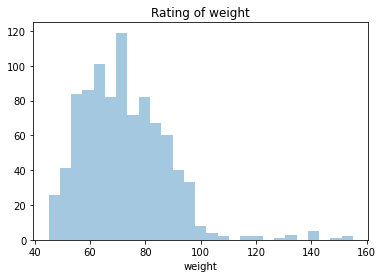

In [112]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_200(x):
    if(x > 200.0 or x < 40.0): # making it betewn 40 and 200
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)


sns.distplot(df['weight'].dropna(), kde=False) #Selecting the column. I need to drop the NA's for the plot
plt.title('Rating of weight')
plt.xlabel('weight')
plt.show()


Because we whant to clean the data, we should keep in mind real world facts when removing impossible values. 

In [113]:
# Creating the variable mean steps per participant

# mean values of each row mean(axis=1)
# Select column from beginning and end at '...' column
df['mean_step'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_step
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


## Feature engineering

By knowing to height and weigth we can calculate the helth indicator BMI.
BMI = Kg/m^2

In [114]:
df["bmi"] = df["weight"] / ((df["height"]/100)**2) 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_step,bmi
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423


## Exploratory data analysis

An analysis of mean steps per participant:

In [115]:
#Graph of the distribution
fig = px.histogram(df, x="mean_step",title="Average step", range_x = (0,50000))
fig.show()

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



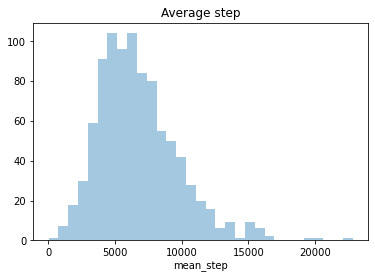

In [116]:
# Same Graph of the distribution using matplotlib
df['mean_step'] = df['mean_step'].apply(pd.to_numeric, errors='coerce')
def above_25000(x):
    if(x > 25000):
        return float('NaN')
    else:
        return x
df['mean_step'] = df['mean_step'].apply(above_25000)


df['mean_step'].name = 'mean_step' #Labeling the variable for plotting
age = df['mean_step'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(age, kde=False)
plt.title('Average step')
plt.show()

In [117]:
#Summary statistics
df["mean_step"].describe()

count      921.000000
mean      6703.996351
std       2948.662012
min          4.000000
25%       4634.372549
50%       6240.073034
75%       8327.528037
max      22842.716846
Name: mean_step, dtype: float64

The histograme shows a positive distrubution with steps averaging from 0 to 16K. We notice a cuvy shape whith the pick. There are anomalies data that shows average step over 20k. Right tilted. 

The relation of mean steps per participant with two categorical variables (e.g. gender, age, education):

In [118]:
# Graph of the relation
fig = px.histogram(df, x="gender", y="mean_step")
fig.show()

In [119]:
fig = px.histogram(df, x="age", y='mean_step', histfunc='avg')
fig.show()

On an average step count we can determine that from the 1st graph, men walk slitly more than women and from the 2nd graph, the age groupe that walks more are the 55-64.

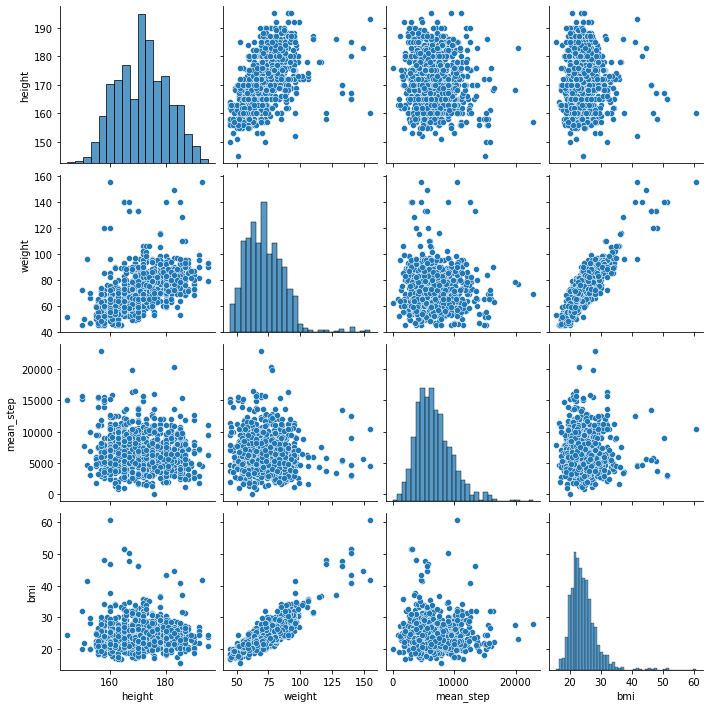

In [120]:
# scatterplot matrix of the numerical variables
df_sel = df[['height', 'weight', 'mean_step', 'bmi']] #making a new dataframe with a subset
sns.pairplot(df_sel)
plt.show()

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



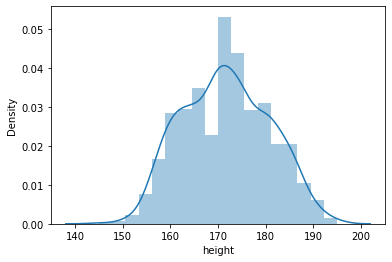

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



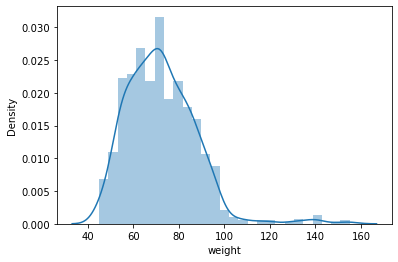

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



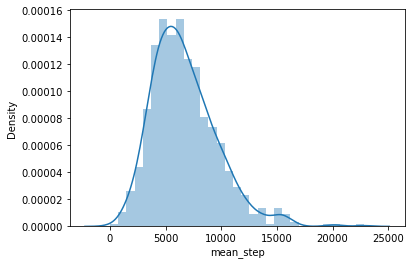

In [121]:
sns.distplot(df['height'])
plt.show()
sns.distplot(df['weight'])
plt.show()
sns.distplot(df['mean_step'])
plt.show()

Their semes to be unreal values above 120 in the weith variable but for the purpose of the study we shall leave it.

In [122]:
# correlation matrix of the numerical variables
corr = df[['height', 'weight', 'mean_step','bmi']].corr()
corr

,height,weight,mean_step,bmi
height,1.000000,0.508194,-0.086249,0.020076
weight,0.508194,1.000000,-0.063273,0.866354
mean_step,-0.086249,-0.063273,1.000000,-0.025458
bmi,0.020076,0.866354,-0.025458,1.000000


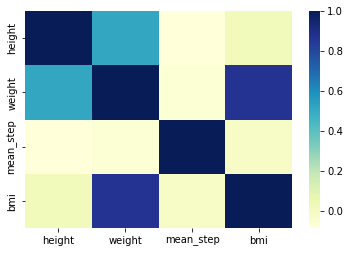

In [123]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

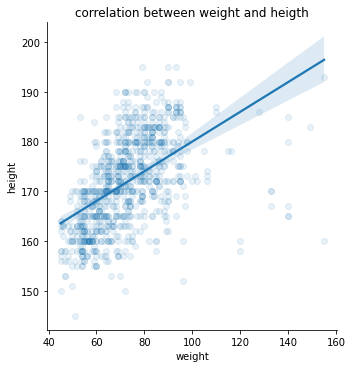

In [124]:
sns.lmplot(x='weight', y='height', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('weight') #use matplotlib to refine Seaborn plot
plt.ylabel('height')
plt.title('correlation between weight and heigth')
plt.show()

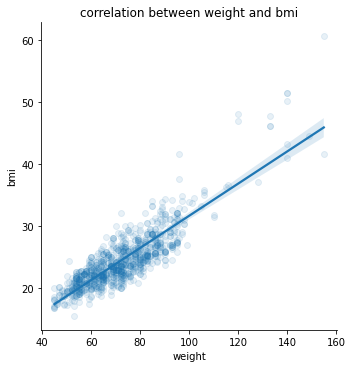

In [125]:
sns.lmplot(x='weight', y='bmi', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('weight') #use matplotlib to refine Seaborn plot
plt.ylabel('bmi')
plt.title('correlation between weight and bmi')
plt.show()

In [126]:
#from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
#print(pearsonr(df_sel['weight'],df_sel['heigth']))
#print(pearsonr(df_sel['weight'],df_sel['bmi']))


We can see that their is a strong correlation beteween the weigth and heigth and that reminded us of the bmi. After adding the new veriable into the testing, their is a also a strong correlation between the bmi and weigth.

The p-value .............

## Predictive model

Expaining linear Regrassion:

When ploting a data set and wanting to predict it, we use linear regrassion as a tool. The regration line can have a positive or negative relationship depending on the x/y variables and it's based on the least squars methode. The line needs to be acurate so the least erros from the real values.

Creating dummy variables for the categorical variables

In [127]:
p_df = df[['weight','height','mean_step']]
p_df = p_df.dropna()
p_df.head()

,weight,height,mean_step
0,98.0,178.0,10205.521212
1,77.0,180.0,5687.423313
2,83.0,180.0,8301.729730
3,80.0,178.0,3633.200000
4,61.0,167.0,5312.129630


In [128]:
dum = pd.get_dummies(df['gender'])
# as a requierment for the machine learning model We should take out the 1stcolumn
dum = pd.get_dummies(df['gender']).iloc[:,1:]
dum.rename(columns={'Male': 'gender'}, inplace=True)
dum.head()

,gender
0,1
1,1
2,1
3,1
4,0


In [129]:
p_df = pd.concat([p_df, dum],axis=1)
p_df.head()

,weight,height,mean_step,gender
0,98.0,178.0,10205.521212,1
1,77.0,180.0,5687.423313,1
2,83.0,180.0,8301.729730,1
3,80.0,178.0,3633.200000,1
4,61.0,167.0,5312.129630,0


Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [130]:
y = p_df['mean_step'] #We need to take out the rating as our Y-variable
X = p_df[['weight', 'height', 'gender']]
X.head()

,weight,height,gender
0,98.0,178.0,1
1,77.0,180.0,1
2,83.0,180.0,1
3,80.0,178.0,1
4,61.0,167.0,0


We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,weight,height,gender
66,60.0,170.0,0
742,61.0,170.0,1
364,68.0,168.0,0
368,76.0,159.0,0
803,53.0,160.0,0


In [138]:
# This solution fixed 
y_train = np.nan_to_num(y_train)
X_train = np.nan_to_num(X_train)
# let's train the linear model.
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [139]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-13.327811,weight
40.423451,height
-594.210257,gender


In [142]:
# This solution fixed 
X_test = np.nan_to_num(X_test)

y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions


## Evaluation

In [143]:
r2_score(y_test, y_test_p)

0.061701357800677537

In [146]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

2892.7892238504496

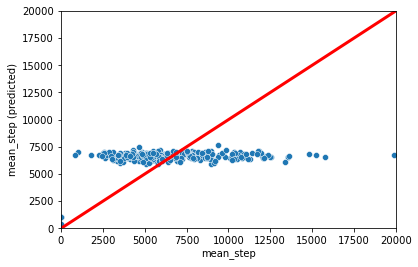

In [147]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 20000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 20000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 20000], [0, 20000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('mean_step')
plt.ylabel('mean_step (predicted)')
plt.show()

After oue evaluation of the model, we observe tha our residuals are not increasing positively or negatively

## Conclusion

Not the resusuls Iwas expected from this anilysis.
Probably, using multiple regression was not the best choise. Nowing that the variables whith higth correlation were known, it could have been combined and give the best fit.
exemple:  weight and height.